### Assignment - 01
#### Team Members :
- Aniket Tiwari - MDS202308<br>
- Bibek Paul - MDS202317<br>

## Task - 01

In [ ]:
import os
import pandas as pd
import numpy as np

from keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
import warnings
warnings.filterwarnings("ignore")

- Data split

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((10000, 28, 28), (10000,), (60000, 28, 28), (60000,))

In [ ]:
y_test = pd.Series(y_test)
y_train = pd.Series(y_train)

- Applying on the y_train, y_test

In [ ]:
class CNN:
    def __init__(self, X_train, y_train, X_test, y_test) -> None:
        self.X_train = X_train / 255
        self.y_train = y_train
        self.X_test = X_test/ 255
        self.y_test = y_test
        self.model = None
        self.history = None

    def transform(self, change, value):
        for k, v in change.items():
            self.y_test.replace(k, v, inplace=True)
            self.y_train.replace(k, v, inplace=True)

        self.y_train = self.y_train.map(value)
        self.y_test = self.y_test.map(value)

    def architecture(self):
        models = Sequential()
        models.add(Conv2D(64,(5,5),padding='same',activation = 'relu',input_shape =(28,28,1)))
        models.add(MaxPooling2D(pool_size=(2,2)))

        models.add(Conv2D(128,(5,5),padding='same',activation = 'relu'))
        models.add(MaxPooling2D(pool_size=(2,2)))

        models.add(Conv2D(256,(5,5),padding='same',activation = 'relu'))
        models.add(MaxPooling2D(pool_size=(2,2)))

        models.add(Flatten())
        models.add(Dense(256,activation = 'relu'))
        models.add(Dense(3,activation = 'softmax'))

        models.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

        self.model = models

    def summary(self):
        self.architecture()
        return self.model.summary()

    def fit(self, epoch):
        model_path = './model.h5'
        '''if os.path.exists(model_path):
            self.model = load_model(model_path)
            self.model.compile(optimizer=Adam(learning_rate=1e-3),
                              loss='sparse_categorical_crossentropy',
                              metrics=['sparse_categorical_accuracy'])'''

        history = self.model.fit(
                  self.X_train.astype(np.float32), self.y_train.astype(np.float32),
                  epochs=epoch,
                  steps_per_epoch=100,
                  validation_split=0.33
                  )

        self.model.save(model_path, overwrite=True)
        self.history = history

    def predict(self):
        predictions = self.model.predict(self.X_test)
        y_pred = [np.argmax(val) for val in predictions]

        acc_scr = accuracy_score(np.array(self.y_test), y_pred)

        print(acc_scr)
        print(classification_report(np.array(self.y_test), y_pred))


    def display(self):
        plt.figure(figsize=(15, 5))

        # Accuracy vs Epoch plot
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['sparse_categorical_accuracy'])
        plt.plot(self.history.history['val_sparse_categorical_accuracy'])
        plt.title('Model Accuracy')
        plt.ylabel('Accuracy')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')

        # Loss vs Epoch plot
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Val'], loc='upper left')
        #plt.tight_layout()
        plt.show()




In [ ]:
change = {9: 'shoes', 0: 'clothes', 3: 'clothes', 2: 'clothes', 7: 'shoes', 5: 'shoes', 1: 'clothes', 6: 'clothes', 4: 'clothes', 8: 'others'}
dict_val = {'shoes': 0, 'clothes': 1, 'others': 2}

#### Epoch = 10

In [ ]:
cnn_model_10 = CNN(X_train, y_train, X_test, y_test)
cnn_model_10.transform(change, dict_val)
cnn_model_10.y_test.unique(), cnn_model_10.y_train.unique()

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
cnn_model_10.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,899 (6.17 MB)

 Trainable params: 1,616,899 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

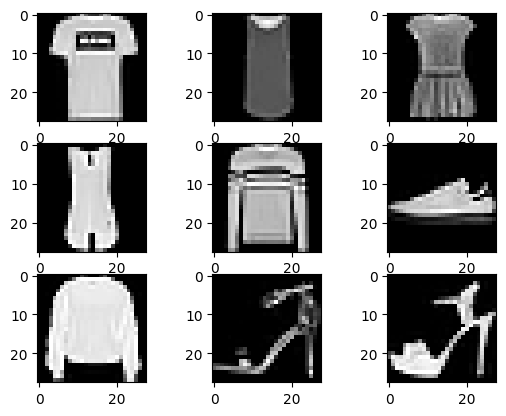

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(cnn_model_10.X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 77ms/step - loss: 0.2622 - sparse_categorical_accuracy: 0.8818 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 0.9919
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0275 - val_sparse_categorical_accuracy: 0.9919
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0265 - sparse_categorical_accuracy: 0.9928 - val_loss: 0.0160 - val_sparse_categorical_accuracy: 0.9958
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0160 - val_sparse_categorical_accuracy: 0.9958
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0181 - sparse_categorical_accuracy: 0.9952 - val_loss: 0.0167 - val_sparse_categorical_accuracy: 0.9945
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0167 - val_sparse_ca

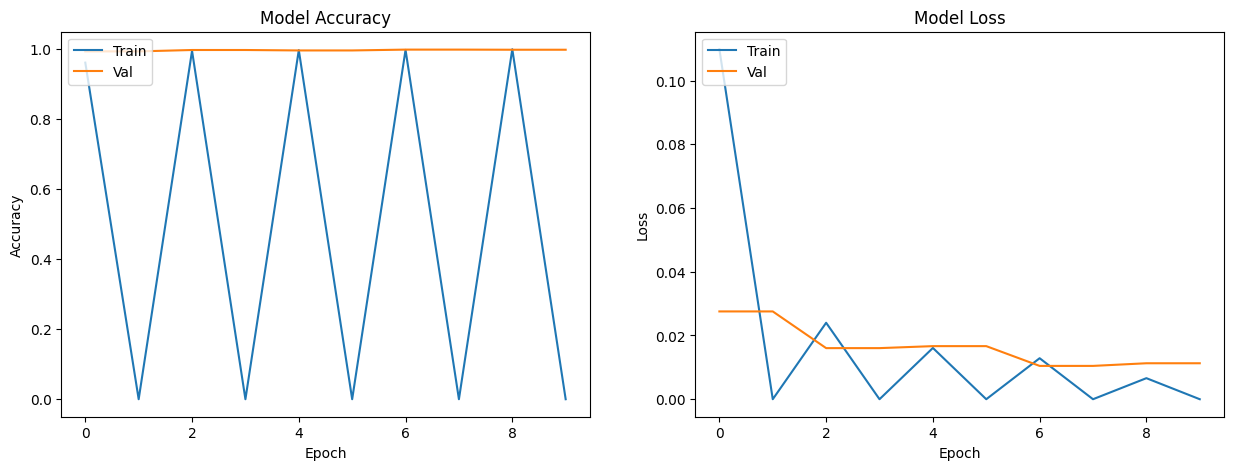

In [ ]:
cnn_model_10.fit(10)
cnn_model_10.display()

#### Epoch = 15

In [ ]:
cnn_model_15 = CNN(X_train, y_train, X_test, y_test)
cnn_model_15.transform(change, dict_val)
cnn_model_15.y_test.unique(), cnn_model_15.y_train.unique()

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
cnn_model_15.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,899 (6.17 MB)

 Trainable params: 1,616,899 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

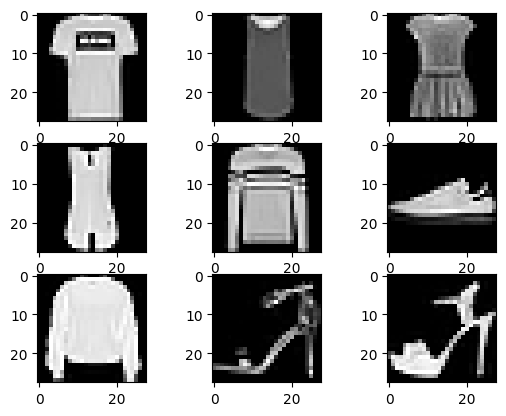

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(cnn_model_15.X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - loss: 0.2914 - sparse_categorical_accuracy: 0.8814 - val_loss: 0.0310 - val_sparse_categorical_accuracy: 0.9910
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0310 - val_sparse_categorical_accuracy: 0.9910
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - loss: 0.0305 - sparse_categorical_accuracy: 0.9922 - val_loss: 0.0190 - val_sparse_categorical_accuracy: 0.9946
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0190 - val_sparse_categorical_accuracy: 0.9946
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 0.0203 - sparse_categorical_accuracy: 0.9945 - val_loss: 0.0182 - val_sparse_categorical_accuracy: 0.9953
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0182 - val_sparse_c

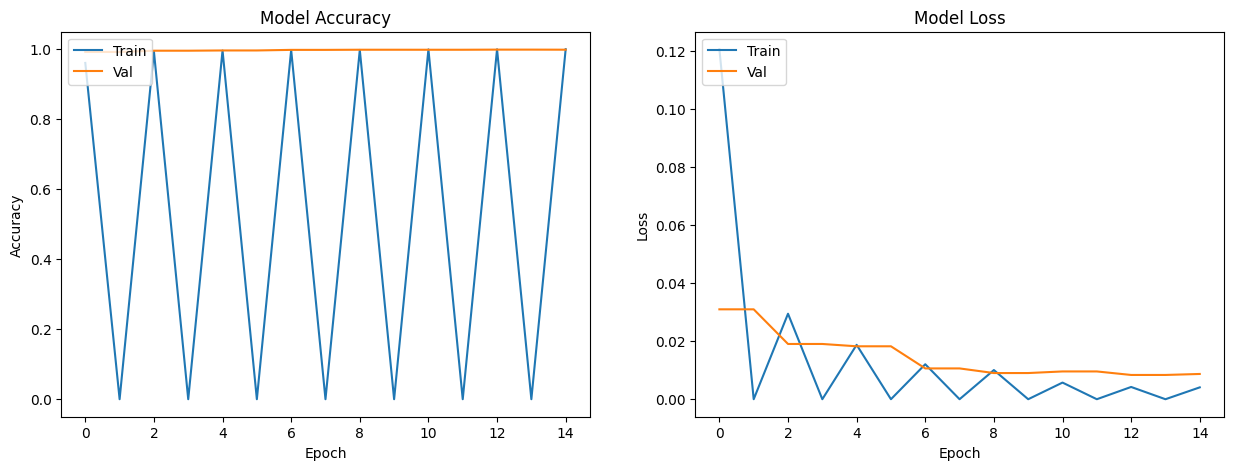

In [ ]:
cnn_model_15.fit(15)
cnn_model_15.display()

#### Prediction on model with epoch = 10

In [ ]:
cnn_model_10.predict()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
0.9952
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      0.99      1.00      6000
           2       0.97      0.99      0.98      1000

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



#### Prediction on model with epoch = 15

In [ ]:
cnn_model_15.predict()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9969
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       1.00      1.00      1.00      6000
           2       0.98      0.99      0.99      1000

    accuracy                           1.00     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       1.00      1.00      1.00     10000



### Shuffle Effect on model with epoch = 15

In [ ]:
train_images_flat = X_train.reshape(X_train.shape[0], -1)
test_images_flat = X_test.reshape(X_test.shape[0], -1)

permutation = np.random.permutation(train_images_flat.shape[1])

train_images_shuffled = train_images_flat[:, permutation]
test_images_shuffled = test_images_flat[:, permutation]

X_train_shuff = train_images_shuffled.reshape(X_train.shape[0], 28, 28)
X_test_shuff = test_images_shuffled.reshape(X_test.shape[0], 28, 28)

#### Epoch = 15

In [ ]:
cnn_model_15 = CNN(X_train_shuff, y_train, X_test_shuff, y_test)
cnn_model_15.transform(change, dict_val)
cnn_model_15.y_test.unique(), cnn_model_15.y_train.unique()

(array([0, 1, 2]), array([0, 1, 2]))

In [ ]:
cnn_model_15.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 256)           │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,616,899 (6.17 MB)

 Trainable params: 1,616,899 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

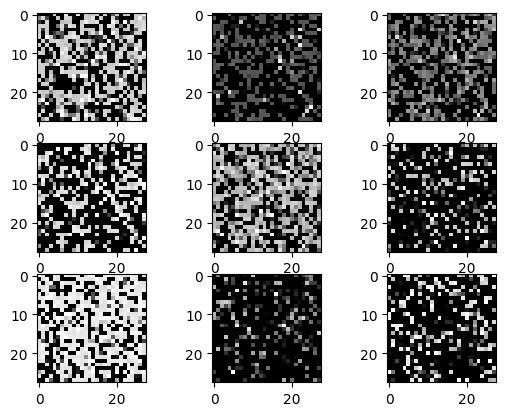

In [ ]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(cnn_model_15.X_train[i], cmap=plt.get_cmap('gray'))

plt.show()

Epoch 1/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 128ms/step - loss: 0.6345 - sparse_categorical_accuracy: 0.7262 - val_loss: 0.0857 - val_sparse_categorical_accuracy: 0.9704
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0857 - val_sparse_categorical_accuracy: 0.9704
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - loss: 0.0574 - sparse_categorical_accuracy: 0.9833 - val_loss: 0.0454 - val_sparse_categorical_accuracy: 0.9867
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0454 - val_sparse_categorical_accuracy: 0.9867
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - loss: 0.0393 - sparse_categorical_accuracy: 0.9893 - val_loss: 0.0344 - val_sparse_categorical_accuracy: 0.9900
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0000e+00 - val_loss: 0.0344 - val_sparse_c

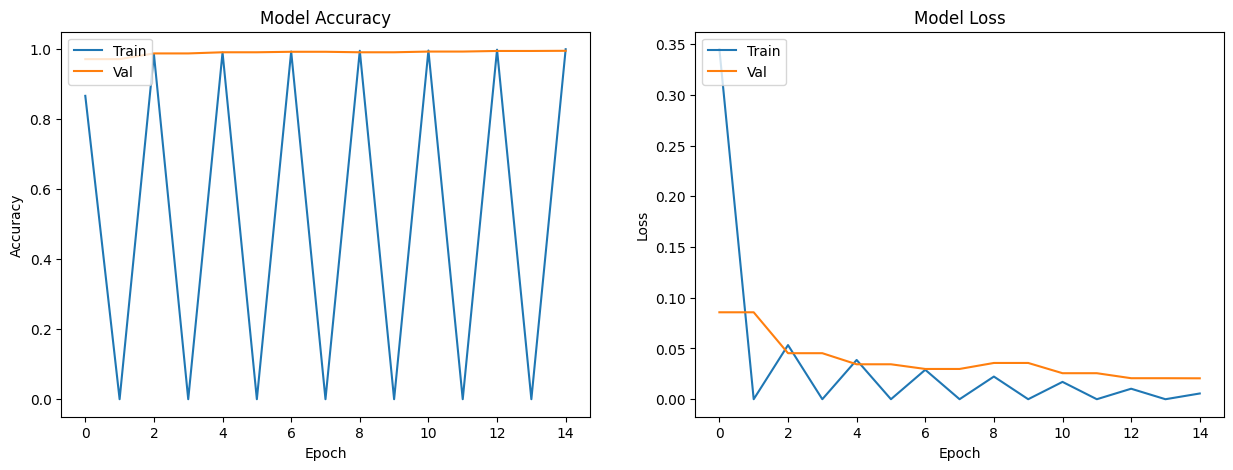

In [ ]:
cnn_model_15.fit(15)
cnn_model_15.display()

In [ ]:
cnn_model_15.predict()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
0.9929
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3000
           1       0.99      1.00      0.99      6000
           2       0.97      0.96      0.96      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



- Performance Decreased from 99.69% to 99.29%

## Task - 02

In [ ]:
import torch, numpy as np, pandas as pd, os
import cv2, glob, torch.nn as nn, torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision
from tqdm import tqdm
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from torch.utils.data import Dataset, DataLoader, random_split, SubsetRandomSampler, Subset
from torchvision import transforms as tf
from torchvision.datasets import ImageFolder
from torchvision.models import resnet18, ResNet18_Weights
from torch.optim import Adam, SGD

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/archive.zip -d /content/drive/MyDrive/EmotionData

In [ ]:
train_path = '/content/drive/MyDrive/EmotionData/train'

total_image_count = 0

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)

    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        image_count = len([img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f'{folder}: {image_count} images')

        total_image_count += image_count

print(f'Total images: {total_image_count}')


angry: 3995 images
disgusted: 436 images
fearful: 4097 images
happy: 7215 images
neutral: 4965 images
sad: 4830 images
surprised: 3171 images
Total images: 28709


In [ ]:
test_path = '/content/drive/MyDrive/EmotionData/test'

total_image_count = 0

for folder in os.listdir(test_path):
    folder_path = os.path.join(test_path, folder)

    if os.path.isdir(folder_path):
        images = os.listdir(folder_path)
        image_count = len([img for img in images if img.lower().endswith(('.png', '.jpg', '.jpeg'))])
        print(f'{folder}: {image_count} images')

        total_image_count += image_count

print(f'Total images: {total_image_count}')


angry: 958 images
disgusted: 111 images
fearful: 1024 images
happy: 1774 images
neutral: 1233 images
sad: 1247 images
surprised: 831 images
Total images: 7178


- Calculating the `mean` & `std` for our dataset.

In [21]:
transforms = tf.Compose([
    tf.Resize((224, 224)),
    tf.ToTensor()  # No normalization here
])

train_dataset = ImageFolder(train_path, transform=transforms)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

def calculate_mean_std(loader):
    mean = torch.zeros(3)
    std = torch.zeros(3)
    total_images_count = 0

    for images, _ in tqdm(loader, desc="Calculating mean and std"):
        batch_samples = images.size(0)
        total_images_count += batch_samples
        mean += images.mean([0, 2, 3]) * batch_samples
        std += images.std([0, 2, 3]) * batch_samples

    mean /= total_images_count
    std /= total_images_count
    return mean, std

mean, std = calculate_mean_std(train_loader)

print(f"Mean: {mean}")
print(f"Std: {std}")

Calculating mean and std: 100%|██████████| 449/449 [02:24<00:00,  3.11it/s]
Mean: tensor([0.5079, 0.5079, 0.5079])
Std: tensor([0.2478, 0.2478, 0.2478])


- Resizing and Normalization of images for faster convergence

In [ ]:
calculated_mean = [0.5079, 0.5079, 0.5079]
calculated_std = [0.2478, 0.2478, 0.2478]

transforms = tf.Compose([tf.Resize((224,224)),
                        tf.ToTensor(),
                        tf.Normalize(mean = calculated_mean, std = calculated_std )])

train = ImageFolder(train_path, transform=transforms)
test = ImageFolder(test_path, transform=transforms)

In [ ]:
train_dataset, val_dataset = torch.utils.data.random_split(train, [int(0.8*len(train)), int(0.2*len(train))+1])

In [ ]:
batch_size = 128

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test, batch_size=batch_size, shuffle=False)

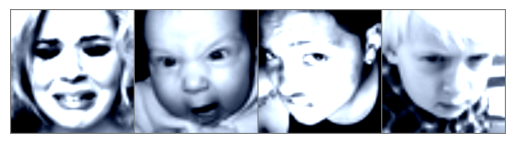

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize if you normalized images, modify as needed
    img = np.clip(img, 0, 1)  # Ensure values are within the valid range
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose the image dimensions
    plt.axis('off')  # Hide axes
    plt.show()

data_iter = iter(train_loader)
images, labels = next(data_iter)

imshow(torchvision.utils.make_grid(images[:4]))

### Training and Evaluation Functions

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))


@torch.no_grad()
def evaluate(model, val_loader, device='cpu'):
    outputs = []
    model.eval()
    for batch in val_loader:
        images, labels = batch
        images = images.to(device)
        labels = labels.to(device)
        out = model(images)
        loss = F.cross_entropy(out, labels)
        acc = accuracy(out, labels)
        outputs.append({'val_loss': loss.detach(), 'val_acc': acc})

    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()

    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD, device = 'cpu'):

    model = model.to(device)
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):

        model.train()
        train_losses = []
        for batch in train_loader:
            images, labels = batch
            images = images.to(device)
            labels = labels.to(device)
            out = model(images)
            loss = F.cross_entropy(out, labels)

            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        result = evaluate(model, val_loader, device)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        history.append(result)

    return history

def losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs')

def accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')

def result(model, device='cpu'):
    test_acc=0
    with torch.no_grad():
        for i, (images, labels) in enumerate(test_loader):

            images = images.to(device)
            y_true = labels.to(device)
            model = model.to(device)

            outputs = model(images)

            _, y_pred = torch.max(outputs.data, 1)

            test_acc += (y_pred == y_true).sum().item()

        print(f"Test set accuracy = {100 * test_acc / len(test)} %")

### Model Definitions

In [ ]:
untrained_1= resnet18(weights=None)
untrained_2 = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

pretrained = resnet18(weights=ResNet18_Weights.IMAGENET1K_V1)

num_classes = len(train.classes)
num_classes

7

In [ ]:
feats = untrained_1.fc.in_features

untrained_1.fc = nn.Sequential(nn.Linear(feats, num_classes))

untrained_2.fc = nn.Sequential(nn.Linear(feats, num_classes))

In [ ]:
for param in pretrained.parameters():
    param.requires_grad = False

pretrained.fc = nn.Sequential(nn.Linear(feats, num_classes))

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

### Untrained Model 1

In [ ]:
history_1 = fit(epochs=15,
                 lr=1e-3,
                 model=untrained_1,
                 train_loader=train_loader,
                 val_loader=valid_loader,
                 opt_func = Adam,
                 device = device)

Epoch [0], train_loss: 1.7137, val_loss: 1.6300, val_acc: 0.3614
Epoch [1], train_loss: 1.3727, val_loss: 1.4289, val_acc: 0.4523
Epoch [2], train_loss: 1.2141, val_loss: 1.3813, val_acc: 0.4723
Epoch [3], train_loss: 1.1028, val_loss: 1.2515, val_acc: 0.5345
Epoch [4], train_loss: 1.0214, val_loss: 1.2409, val_acc: 0.5348
Epoch [5], train_loss: 0.9213, val_loss: 1.5000, val_acc: 0.5260
Epoch [6], train_loss: 0.8072, val_loss: 1.4075, val_acc: 0.5091
Epoch [7], train_loss: 0.6786, val_loss: 1.6328, val_acc: 0.5260
Epoch [8], train_loss: 0.5098, val_loss: 1.6868, val_acc: 0.5200
Epoch [9], train_loss: 0.3483, val_loss: 1.7776, val_acc: 0.5352
Epoch [10], train_loss: 0.2243, val_loss: 1.7501, val_acc: 0.5722
Epoch [11], train_loss: 0.1622, val_loss: 1.9607, val_acc: 0.5576
Epoch [12], train_loss: 0.1023, val_loss: 2.6905, val_acc: 0.5179
Epoch [13], train_loss: 0.0811, val_loss: 2.2261, val_acc: 0.5618
Epoch [14], train_loss: 0.0545, val_loss: 2.1956, val_acc: 0.5852


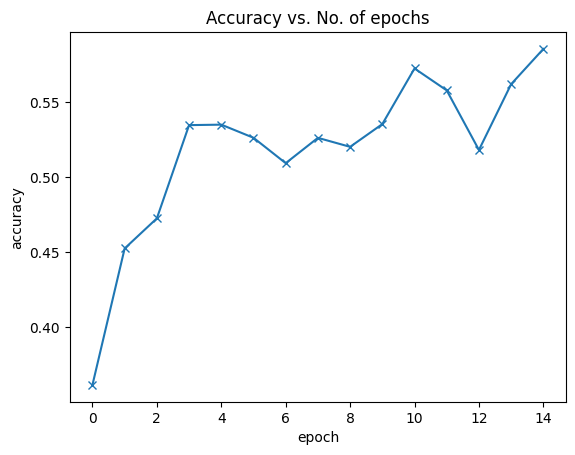

In [ ]:
accuracies(history_1)

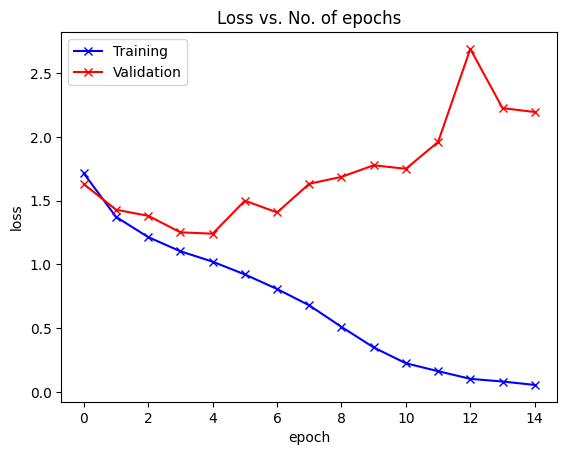

In [ ]:
losses(history_1)

In [ ]:
result(untrained_1, device=device)

Test set accuracy = 59.543048202842016 %


### Untrained Model 2

In [ ]:
# training the untrained model from scratch

history_2 = fit(epochs=15,
                 lr=1e-3,
                 model=untrained_2,
                 train_loader=train_loader,
                 val_loader=valid_loader,
                 opt_func = Adam,
                 device = device)

Epoch [0], train_loss: 1.2052, val_loss: 1.1600, val_acc: 0.5609
Epoch [1], train_loss: 0.9724, val_loss: 1.0788, val_acc: 0.6005
Epoch [2], train_loss: 0.8460, val_loss: 1.0608, val_acc: 0.6168
Epoch [3], train_loss: 0.7022, val_loss: 1.0614, val_acc: 0.6184
Epoch [4], train_loss: 0.5540, val_loss: 1.4991, val_acc: 0.5343
Epoch [5], train_loss: 0.4045, val_loss: 1.2330, val_acc: 0.6297
Epoch [6], train_loss: 0.2634, val_loss: 1.5984, val_acc: 0.6003
Epoch [7], train_loss: 0.1773, val_loss: 1.7089, val_acc: 0.6029
Epoch [8], train_loss: 0.1223, val_loss: 1.8927, val_acc: 0.6011
Epoch [9], train_loss: 0.1034, val_loss: 1.9794, val_acc: 0.5948
Epoch [10], train_loss: 0.0846, val_loss: 1.9646, val_acc: 0.6117
Epoch [11], train_loss: 0.0717, val_loss: 2.1223, val_acc: 0.6182
Epoch [12], train_loss: 0.0661, val_loss: 2.0490, val_acc: 0.6192
Epoch [13], train_loss: 0.0759, val_loss: 2.0389, val_acc: 0.6215
Epoch [14], train_loss: 0.0650, val_loss: 2.0402, val_acc: 0.6246


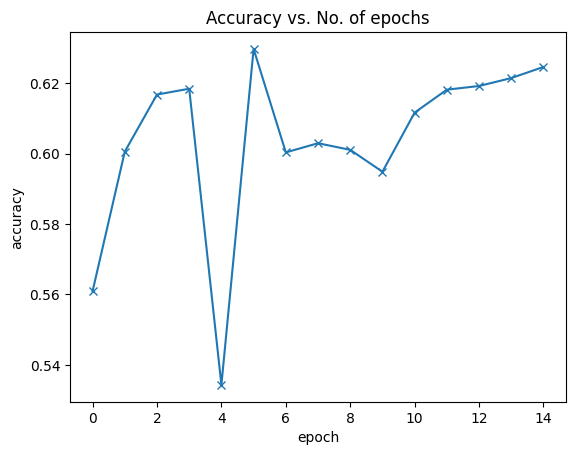

In [ ]:
accuracies(history_2)

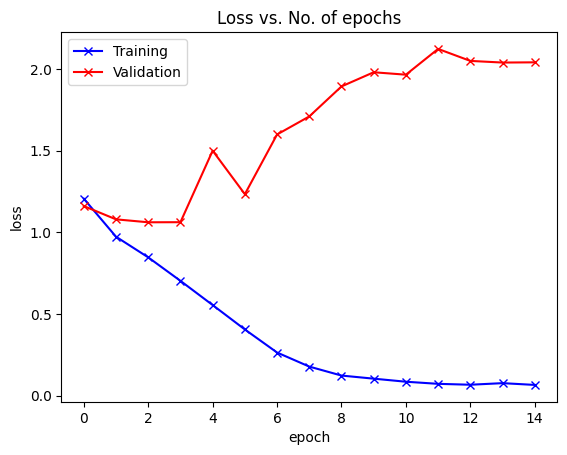

In [ ]:
losses(history_2)

In [ ]:
result(untrained_2, device=device)

Test set accuracy = 63.179158539983284 %


### Pretrained Model

In [ ]:
history_3 = fit(epochs=15,
                 lr=1e-3,
                 model=pretrained,
                 train_loader=train_loader,
                 val_loader=valid_loader,
                 opt_func = Adam,
                 device = device)

Epoch [0], train_loss: 1.6624, val_loss: 1.5729, val_acc: 0.3923
Epoch [1], train_loss: 1.5135, val_loss: 1.5170, val_acc: 0.4168
Epoch [2], train_loss: 1.4733, val_loss: 1.5004, val_acc: 0.4199
Epoch [3], train_loss: 1.4482, val_loss: 1.4781, val_acc: 0.4324
Epoch [4], train_loss: 1.4351, val_loss: 1.4928, val_acc: 0.4377
Epoch [5], train_loss: 1.4248, val_loss: 1.5267, val_acc: 0.4209
Epoch [6], train_loss: 1.4194, val_loss: 1.4730, val_acc: 0.4392
Epoch [7], train_loss: 1.4117, val_loss: 1.5305, val_acc: 0.4221
Epoch [8], train_loss: 1.4040, val_loss: 1.4907, val_acc: 0.4370
Epoch [9], train_loss: 1.3983, val_loss: 1.4841, val_acc: 0.4252
Epoch [10], train_loss: 1.3988, val_loss: 1.4638, val_acc: 0.4448
Epoch [11], train_loss: 1.3928, val_loss: 1.4686, val_acc: 0.4409
Epoch [12], train_loss: 1.3920, val_loss: 1.5161, val_acc: 0.4226
Epoch [13], train_loss: 1.3894, val_loss: 1.4685, val_acc: 0.4418
Epoch [14], train_loss: 1.3846, val_loss: 1.4655, val_acc: 0.4451


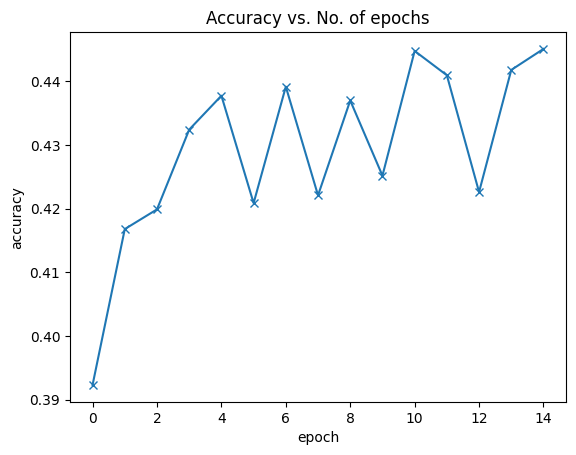

In [ ]:
accuracies(history_3)

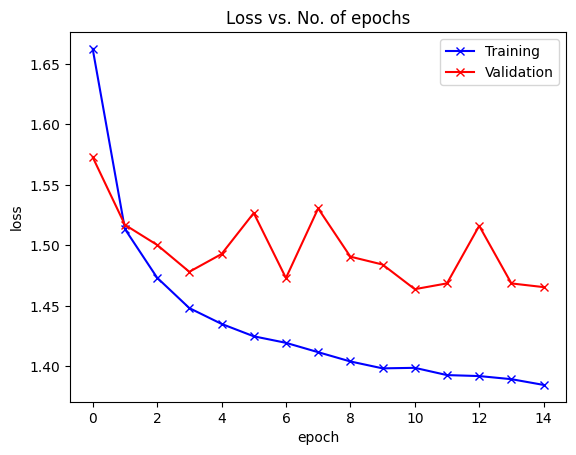

In [ ]:
losses(history_3)